In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
print('Training target data shape:', y_train.shape)
print('Testing target data shape:', y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training target data shape: (50000, 1)
Testing target data shape: (10000, 1)


In [3]:
np. unique(y_train,return_counts=True) # Perfectly balanced data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [4]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [5]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


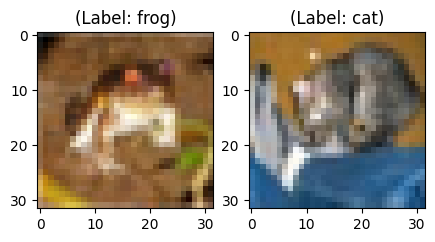

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

# **Visualizing the CIFAR - 10 data**

In [7]:
np.min(x_train),np.max(x_train)

(0, 255)

In [8]:
# Normalize data
x_train = x_train/255.0

In [9]:
# Reshape the image dimensions from three to one (flatten the images)
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))
df_cifar.head()

Size of the dataframe: (50000, 3073)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [10]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [11]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar, columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [12]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522103,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [13]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.2907663  0.11253144]


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

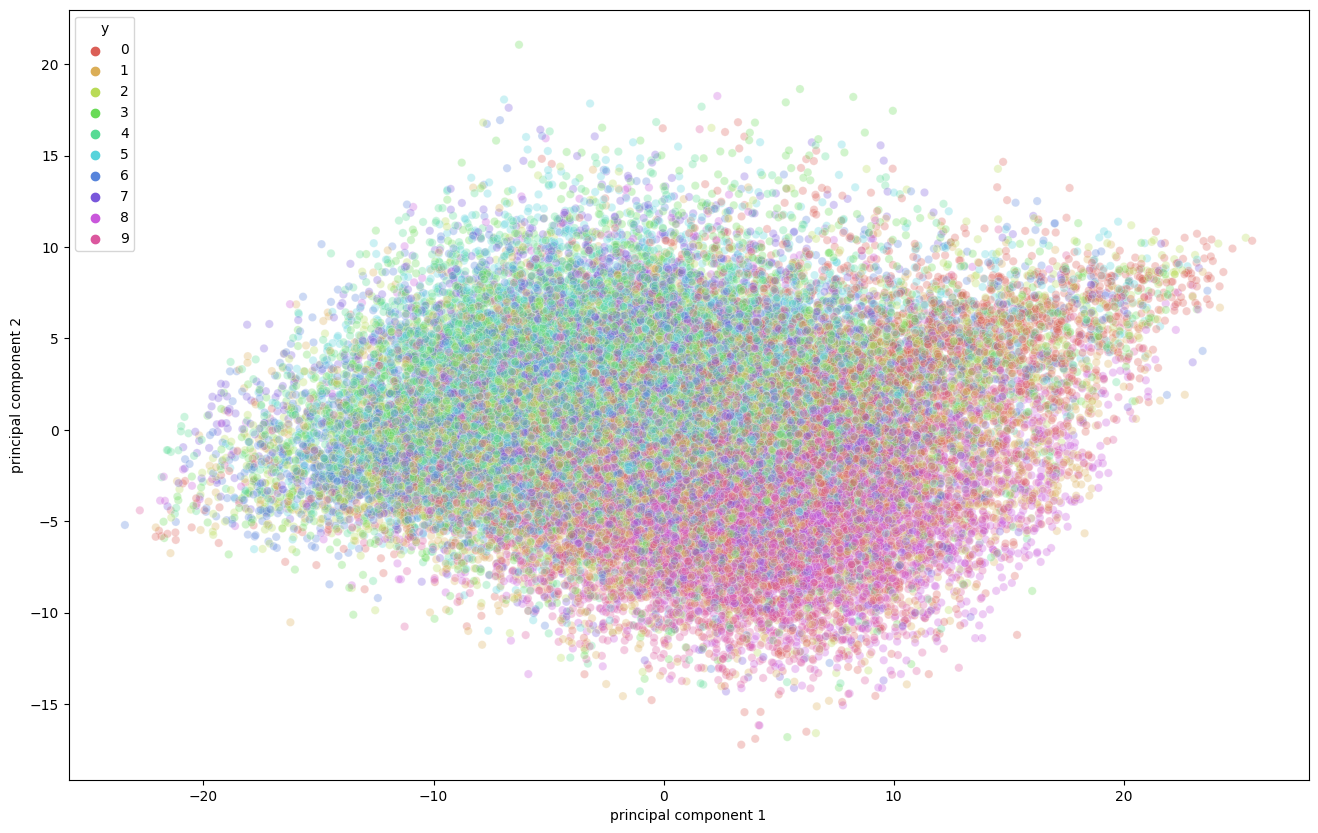

In [14]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

From the figure above, we can see that when projected along the two principal component axes, some structure is present in the points, thus capturing the variation from the principal components. Points that belong to the same class are close together, and points or images that are semantically significantly different are farther apart. 

# **Speed Up Deep Learning Training using PCA with CIFAR - 10 Dataset**

In [15]:
x_test = x_test/255.0
x_test = x_test.reshape(-1,32,32,3)
x_test_flat = x_test.reshape(-1,3072)

In [16]:
pca = PCA(0.9)
pca.fit(x_train_flat)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

Now we will se how many components we need to keep 90% of the variance.

In [17]:
pca.n_components_

99

In [18]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [19]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [20]:
batch_size = 256
num_classes = 10
epochs = 20

In [21]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(99,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              102400    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1,810,698
Trainable params: 1,810,698
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(test_img_pca, y_test))

Epoch 1/20
196/196 [==============================] - 5s 6ms/step - loss: 1.6933 - accuracy: 0.4023 - val_loss: 1.5742 - val_accuracy: 0.4360
Epoch 2/20
196/196 [==============================] - 1s 5ms/step - loss: 1.3716 - accuracy: 0.5150 - val_loss: 1.4008 - val_accuracy: 0.4937
Epoch 3/20
196/196 [==============================] - 1s 5ms/step - loss: 1.1888 - accuracy: 0.5787 - val_loss: 1.3402 - val_accuracy: 0.5285
Epoch 4/20
196/196 [==============================] - 1s 5ms/step - loss: 1.0282 - accuracy: 0.6364 - val_loss: 1.3357 - val_accuracy: 0.5474
Epoch 5/20
196/196 [==============================] - 1s 5ms/step - loss: 0.8748 - accuracy: 0.6884 - val_loss: 1.3913 - val_accuracy: 0.5434
Epoch 6/20
196/196 [==============================] - 1s 5ms/step - loss: 0.7183 - accuracy: 0.7459 - val_loss: 1.4431 - val_accuracy: 0.5522
Epoch 7/20
196/196 [==============================] - 1s 5ms/step - loss: 0.5741 - accuracy: 0.7955 - val_loss: 1.6852 - val_accuracy: 0.5303
Epoch 

From the above output, we can see that the training time for each epoch was only 16 seconds on CPU and 1 second on GPU. This model achieved an accuracy of 97% on the training data and only 56% on the test data. This means that the training samples are overfitted. However, remember that the data is projected from 3072 dimensions onto 99 dimensions and still did a great job!

Finally, let's look at how long it takes to train the model on the original data set and the accuracy we can achieve using the same deep learning model. 

In [24]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(x_test_flat, y_test))

Epoch 1/20
196/196 [==============================] - 5s 19ms/step - loss: 2.4101 - accuracy: 0.1953 - val_loss: 1.9646 - val_accuracy: 0.2790
Epoch 2/20
196/196 [==============================] - 2s 11ms/step - loss: 1.9417 - accuracy: 0.2960 - val_loss: 1.8824 - val_accuracy: 0.3189
Epoch 3/20
196/196 [==============================] - 1s 7ms/step - loss: 1.8293 - accuracy: 0.3399 - val_loss: 2.0251 - val_accuracy: 0.3034
Epoch 4/20
196/196 [==============================] - 1s 7ms/step - loss: 1.7580 - accuracy: 0.3712 - val_loss: 1.9025 - val_accuracy: 0.3239
Epoch 5/20
196/196 [==============================] - 2s 9ms/step - loss: 1.7010 - accuracy: 0.3869 - val_loss: 1.6211 - val_accuracy: 0.4224
Epoch 6/20
196/196 [==============================] - 2s 10ms/step - loss: 1.6456 - accuracy: 0.4095 - val_loss: 1.9466 - val_accuracy: 0.3342
Epoch 7/20
196/196 [==============================] - 2s 9ms/step - loss: 1.6105 - accuracy: 0.4221 - val_loss: 1.6170 - val_accuracy: 0.4209
Epo

From the above output, it is clear that the time required to train each epoch on CPU is about 32 seconds and 5 seconds on GPU. This is almost two times as long as the model trained on PCA output.

Moreover, both training and testing accuracies are lower than what he achieved using 99 principal components as inputs to the model.

Therefore, by applying PCA on the training data, we not only trained the deep learning algorithm quickly, but also improved the accuracy on the test data compared to the deep learning algorithm trained on the original training data. . 

# **Test using Data Augmentation + CNN with maxpooling, batch normalization**

Adding more data reduces overfitting. Our model is not overfitted, but it is recommended to add more data when possible. However, data collection is very difficult and data preprocessing is not as flashy as it sounds. But what if we could generate data from existing data? We already have 60,000 images, and we can generate far more images from them. Of course, to our eyes it may look like the same image, but to a machine it is a different image because the pixel values ​​change. We can play around with image colors, image focus, image shift, and more. Image augmentation is very helpful for machines to understand that a cat is a cat, regardless of color or image position.

For data enrichment I use ImageDataGenerator from the Tensorflow Keras preprocessing library. 

In [25]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [28]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image Data Generator , we are shifting image accross width and height also we are flipping the image horizantally.
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(x_train,y_train)
steps = int(x_train.shape[0] / 32)

earlyStopping = EarlyStopping(monitor='val_loss', patience=16, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=8, verbose=1, min_delta=1e-4, mode='min')

history = model.fit(it_train,epochs=200, verbose=1,callbacks=[earlyStopping, mcp_save, reduce_lr_loss], steps_per_epoch=steps,validation_data=(x_test,y_test))

Epoch 1/200
1562/1562 [==============================] - 50s 28ms/step - loss: 1.7108 - accuracy: 0.3984 - val_loss: 1.3504 - val_accuracy: 0.5123 - lr: 0.0010
Epoch 2/200
1562/1562 [==============================] - 44s 28ms/step - loss: 1.2776 - accuracy: 0.5439 - val_loss: 1.1149 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 3/200
1562/1562 [==============================] - 43s 27ms/step - loss: 1.1137 - accuracy: 0.6088 - val_loss: 1.0433 - val_accuracy: 0.6334 - lr: 0.0010
Epoch 4/200
1562/1562 [==============================] - 45s 29ms/step - loss: 0.9957 - accuracy: 0.6568 - val_loss: 0.8188 - val_accuracy: 0.7124 - lr: 0.0010
Epoch 5/200
1562/1562 [==============================] - 41s 26ms/step - loss: 0.9248 - accuracy: 0.6823 - val_loss: 0.7288 - val_accuracy: 0.7480 - lr: 0.0010
Epoch 6/200
1562/1562 [==============================] - 44s 28ms/step - loss: 0.8585 - accuracy: 0.7061 - val_loss: 0.7520 - val_accuracy: 0.7412 - lr: 0.0010
Epoch 7/200
1562/1562 [=================

In [29]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.3784 - accuracy: 0.8760
Test Accuracy: 0.8759999871253967


# **Visualize Accuracy and loss**

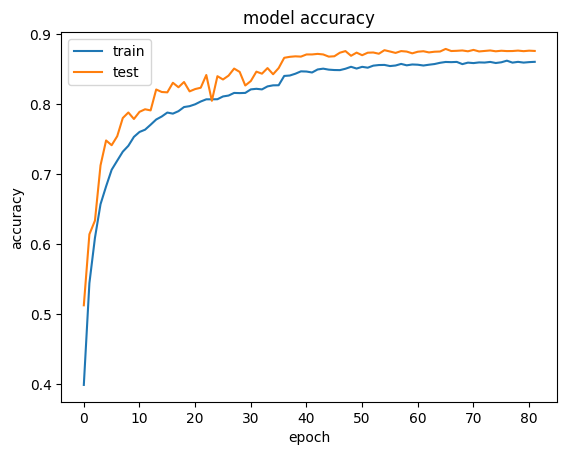

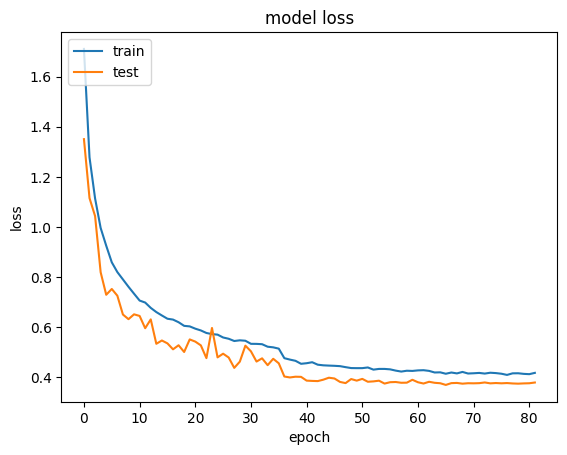

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()